In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos Chicago

In [277]:
df=pd.read_csv('../../Data/listingsChicago.csv')

### Datos Nulos y Outliers

In [291]:
Valores_nulos=df.isnull().sum()
print(Valores_nulos)
df1=df.fillna(method='ffill')
Valores_nulos=df1.isnull().sum()
print(Valores_nulos)
df1=df1[['room_type','number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']]
Valores_nulos=df1.isnull().sum()
print(Valores_nulos)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1312
Length: 75, dtype: int64
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_home

In [292]:
df1.dtypes

room_type                       object
number_of_reviews                int64
host_acceptance_rate            object
review_scores_rating           float64
price                           object
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
dtype: object

In [294]:
#Eliminar Signo de Dolar y convertir columna de price a float
df1['price'] = df1['price'].replace({'\$':''}, regex = True)
df1['price'] = df1['price'].replace({',':''}, regex = True)
df1['price'] = df1['price'].astype(str).astype(float)
#Columna de host_acceptance_rate
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].replace({'%':''}, regex = True)
df1['host_acceptance_rate']= df1['host_acceptance_rate'].astype(str).astype(int)
df1.dtypes

room_type                       object
number_of_reviews                int64
host_acceptance_rate             int32
review_scores_rating           float64
price                          float64
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
dtype: object

<AxesSubplot:>

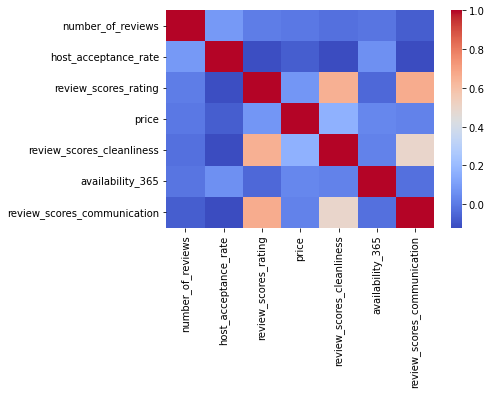

In [295]:
for columna in df1.drop('room_type', axis=1).columns:
  Q3=df1[columna].quantile(q=0.75)
  Q1=df1[columna].quantile(q=0.25)
  Rq=Q3-Q1
  promedio=df1[columna].mean()
  df1[columna]=df1[columna].mask(df1[columna]<Q1-1.5*Rq, promedio)
  df1[columna]=df1[columna].mask(df1[columna]>Q3+1.5*Rq, promedio)
Private_room=df1[df1['room_type']=='Private room']
Shared_room=df1[df1['room_type']=='Shared room']
Hotel_room=df1[df1['room_type']=='Hotel room']
Corr_Factors=Private_room.corr()
Heat_Map=sns.heatmap(Corr_Factors,cmap='coolwarm')
Heat_Map

In [296]:
print(Valores_nulos)

room_type                      0
number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
dtype: int64


### Punto 4

#### Private Room

,Predicciones,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
Predicciones,1.000000,1.000000,0.110467,0.033860,0.052642,0.031413,0.118636,0.225381
number_of_reviews,1.000000,1.000000,0.110467,0.033860,0.052642,0.031413,0.118636,0.225381
host_acceptance_rate,0.110467,0.110467,1.000000,0.028032,0.095216,0.017576,0.060859,0.068843
review_scores_rating,0.033860,0.033860,0.028032,1.000000,0.011643,0.560293,0.014890,0.474082
price,0.052642,0.052642,0.095216,0.011643,1.000000,0.050115,0.121293,0.035810
review_scores_cleanliness,0.031413,0.031413,0.017576,0.560293,0.050115,1.000000,0.028627,0.344338
availability_365,0.118636,0.118636,0.060859,0.014890,0.121293,0.028627,1.000000,0.102009
review_scores_communication,0.225381,0.225381,0.068843,0.474082,0.035810,0.344338,0.102009,1.000000


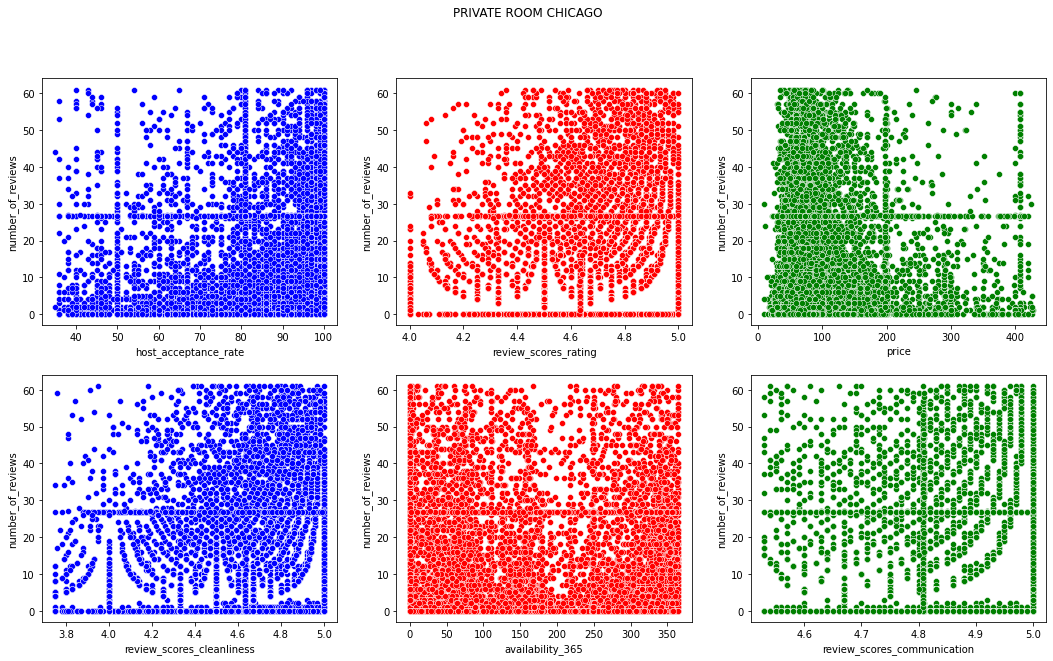

In [325]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('PRIVATE ROOM CHICAGO')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Private_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Private_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Private_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Private_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Private_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Private_room)
abs(Private_room.corr())


#### Shared Room

,Predicciones,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
Predicciones,1.000000,1.000000,0.011957,0.052601,0.129885,0.081440,0.061782,0.294074
number_of_reviews,1.000000,1.000000,0.011957,0.052601,0.129885,0.081440,0.061782,0.294074
host_acceptance_rate,0.011957,0.011957,1.000000,0.027584,0.020524,0.009451,0.123125,0.002171
review_scores_rating,0.052601,0.052601,0.027584,1.000000,0.107108,0.517498,0.009708,0.477443
price,0.129885,0.129885,0.020524,0.107108,1.000000,0.058150,0.088264,0.113228
review_scores_cleanliness,0.081440,0.081440,0.009451,0.517498,0.058150,1.000000,0.051547,0.374877
availability_365,0.061782,0.061782,0.123125,0.009708,0.088264,0.051547,1.000000,0.123047
review_scores_communication,0.294074,0.294074,0.002171,0.477443,0.113228,0.374877,0.123047,1.000000


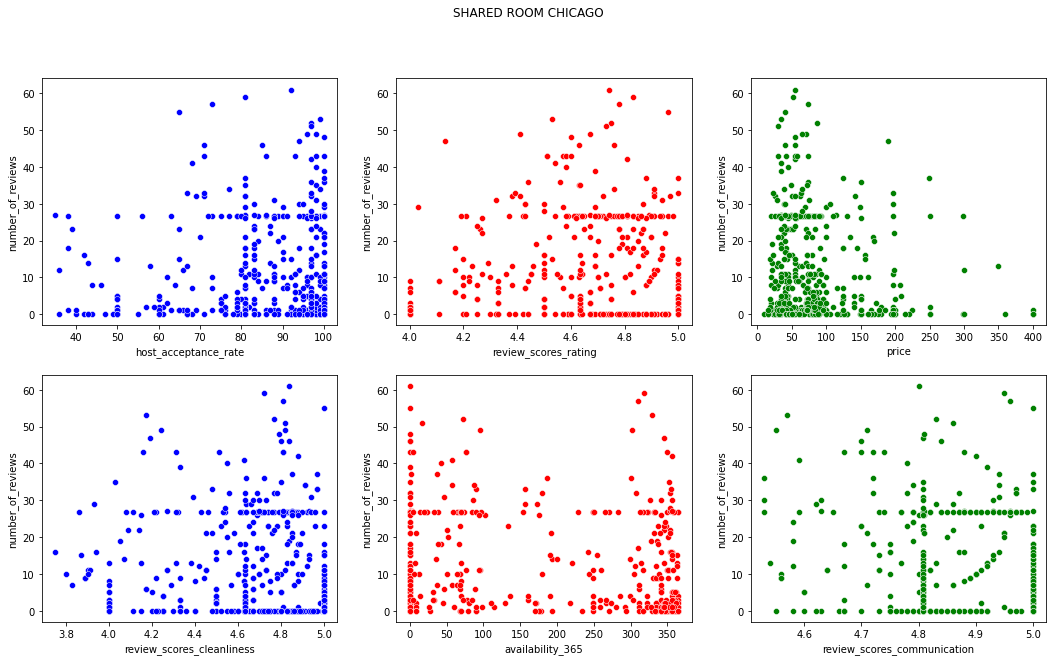

In [324]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('SHARED ROOM CHICAGO')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Shared_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Shared_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Shared_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Shared_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Shared_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Shared_room)
abs(Shared_room.corr())

#### Hotel Room

,Predicciones,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
Predicciones,1.000000,1.000000,0.086405,0.460889,0.145465,0.410524,0.019850,0.562974
number_of_reviews,1.000000,1.000000,0.086405,0.460889,0.145465,0.410524,0.019850,0.562974
host_acceptance_rate,0.086405,0.086405,1.000000,0.003157,0.046559,0.044406,0.204846,0.021424
review_scores_rating,0.460889,0.460889,0.003157,1.000000,0.119131,0.646870,0.071783,0.566936
price,0.145465,0.145465,0.046559,0.119131,1.000000,0.068308,0.447615,0.047211
review_scores_cleanliness,0.410524,0.410524,0.044406,0.646870,0.068308,1.000000,0.088489,0.479995
availability_365,0.019850,0.019850,0.204846,0.071783,0.447615,0.088489,1.000000,0.039525
review_scores_communication,0.562974,0.562974,0.021424,0.566936,0.047211,0.479995,0.039525,1.000000


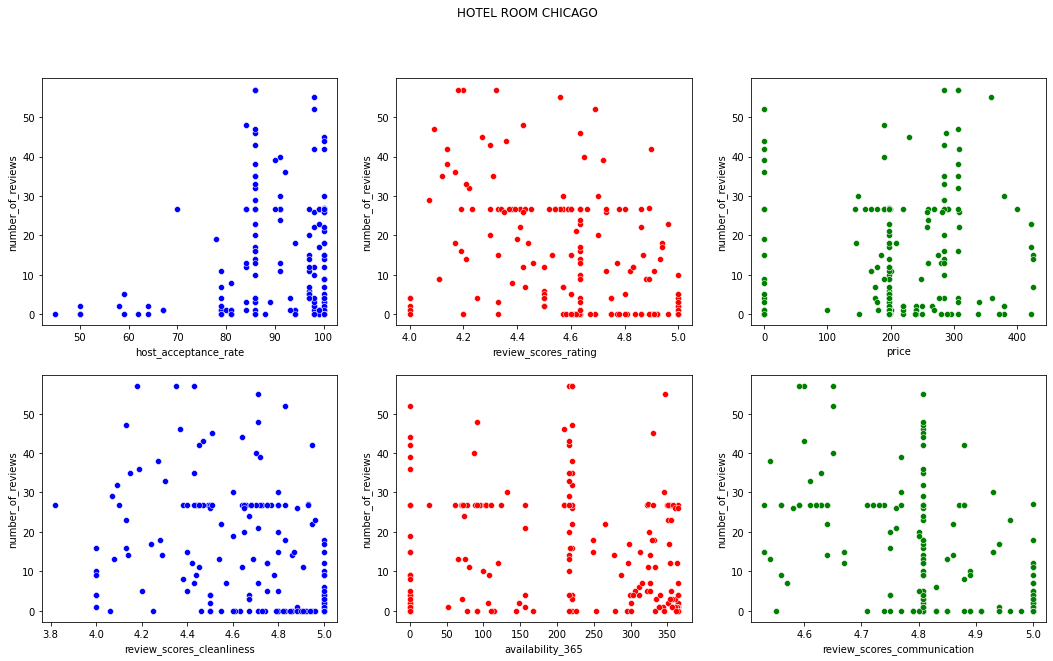

In [323]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('HOTEL ROOM CHICAGO')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Hotel_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Hotel_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Hotel_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Hotel_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Hotel_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Hotel_room)
abs(Hotel_room.corr())

### Punto 5

#### Private Room

0.0057184534257795905


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
0,-838.769509,Private room,46.316968,97.0,4.99,110.0,4.99,320,4.99
3,-142.351654,Private room,13.000000,89.0,5.00,329.0,5.00,165,5.00
7,-838.769509,Private room,46.316968,85.0,4.99,110.0,5.00,0,4.98
9,-1814.575505,Private room,93.000000,98.0,4.86,77.0,4.71,328,4.92
10,-2316.242660,Private room,117.000000,98.0,4.88,66.0,4.65,304,4.96


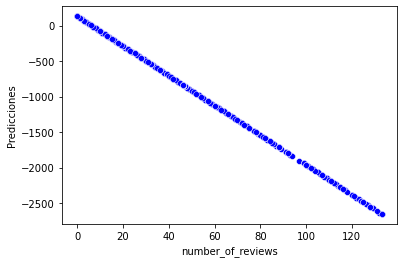

In [301]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelPR=LinearRegression()
Vars_Indep= Private_room[['review_scores_communication']]
Var_Dep= Private_room['number_of_reviews']
modelPR.fit(X=Vars_Indep,y=Var_Dep)
y_pred=modelPR.predict(X=Private_room[['number_of_reviews']])
Private_room.insert(0,'Predicciones',y_pred)
print(modelPR.score(Vars_Indep,Var_Dep))
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='blue',data=Private_room)
Private_room.head()

#### Shared Room

In [302]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelSR=LinearRegression()
SRVars_Indep= Shared_room[['review_scores_communication']]
SRVar_Dep= Shared_room['number_of_reviews']
modelSR.fit(X=SRVars_Indep,y=SRVar_Dep)
y_pred=modelSR.predict(X=Shared_room[['number_of_reviews']])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


-0.08311348386620576


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
40,-4443.769686,Shared room,67.000000,91.0,4.55,69.0,4.38,348,4.94
53,-2956.995290,Shared room,46.316968,95.0,4.66,226.0,4.38,177,4.82
84,-2956.995290,Shared room,46.316968,95.0,4.58,27.0,4.46,176,4.79
119,-2956.995290,Shared room,46.316968,100.0,4.51,64.0,4.60,106,4.72
176,-2956.995290,Shared room,46.316968,95.0,4.77,28.0,4.65,175,4.87


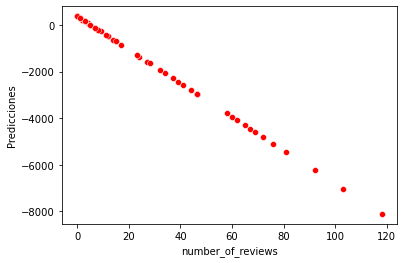

In [303]:
print(modelSR.score(Vars_Indep,Var_Dep))
Shared_room.insert(0,'Predicciones',y_pred)
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='red',data=Shared_room)
Shared_room.head()

#### Hotel Room

-0.08311348386620576


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
231,-5090.723649,Hotel room,76.0,98.0,4.92,408.0,4.99,321,4.950000
370,-2718.559120,Hotel room,43.0,98.0,4.98,313.0,5.00,193,4.930000
381,-1999.721384,Hotel room,33.0,98.0,4.91,408.0,4.94,0,4.940000
842,-1640.302516,Hotel room,28.0,99.0,4.79,97.0,4.82,348,4.820000
844,-1065.232327,Hotel room,20.0,99.0,4.20,97.0,4.55,348,4.817088


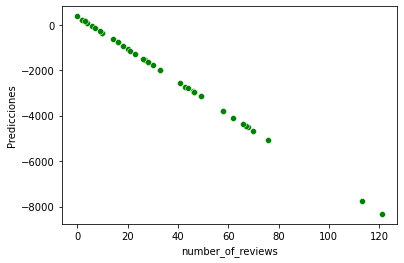

In [304]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelHR=LinearRegression()
SRVars_Indep= Shared_room[['review_scores_communication']]
SRVar_Dep= Shared_room['number_of_reviews']
modelHR.fit(X=SRVars_Indep,y=SRVar_Dep)
y_pred3=modelSR.predict(X=Hotel_room[['number_of_reviews']])
print(modelHR.score(Vars_Indep,Var_Dep))
Hotel_room.insert(0,'Predicciones',y_pred3)
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='green',data=Hotel_room)
Hotel_room.head()

#### Tabla de Coeficientes

In [305]:
Coef_Deter_Hotel=round(modelHR.score(Vars_Indep,Var_Dep),5)
Coef_Deter_Shared=round(modelSR.score(Vars_Indep,Var_Dep),5)
Coef_Deter_Private=round(modelPR.score(Vars_Indep,Var_Dep),5)
Coef_Corr_Hotel=round(np.sqrt(abs(Coef_Deter_Hotel)),5)
Coef_Corr_Shared=round(np.sqrt(abs(Coef_Deter_Shared)),5)
Coef_Corr_Private=round(np.sqrt(Coef_Deter_Private),5)
Coefs = ["Coef_Deter", "Coef_Corr"]
titulo = ["Private_Room", "Shared_Room", "Hotel_Room"]
data = [[Coef_Deter_Private, Coef_Deter_Shared, Coef_Deter_Hotel],
[Coef_Corr_Private, Coef_Corr_Shared, Coef_Corr_Hotel]]
format_row = "{:>12}" * (len(titulo) + 1)
print(format_row.format("", *titulo))
for team, row in zip(Coefs, data):
    print(format_row.format(team, *row))

            Private_Room Shared_Room  Hotel_Room
  Coef_Deter     0.00572    -0.08311    -0.08311
   Coef_Corr     0.07563     0.28829     0.28829


# Datos NY

In [306]:
df=pd.read_csv('../../Data/listingsNY.csv')

C:\Users\LUIS JAVIER\AppData\Local\Temp\ipykernel_252\1483232281.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../../Data/listingsNY.csv')


### Datos Nulos y Outliers

In [307]:
Valores_nulos=df.isnull().sum()
print(Valores_nulos)
df1=df.fillna(method='ffill')
Valores_nulos=df1.isnull().sum()
print(Valores_nulos)
df1=df1[['room_type','number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']]
Valores_nulos=df1.isnull().sum()
print(Valores_nulos)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8362
Length: 75, dtype: int64
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_home

In [308]:
df1.dtypes

room_type                       object
number_of_reviews                int64
host_acceptance_rate            object
review_scores_rating           float64
price                           object
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
dtype: object

In [309]:
#Eliminar Signo de Dolar y convertir columna de price a float
df1['price'] = df1['price'].replace({'\$':''}, regex = True)
df1['price'] = df1['price'].replace({',':''}, regex = True)
df1['price'] = df1['price'].astype(str).astype(float)
#Columna de host_acceptance_rate
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].replace({'%':''}, regex = True)
df1['host_acceptance_rate']= df1['host_acceptance_rate'].astype(str).astype(int)
df1.dtypes

room_type                       object
number_of_reviews                int64
host_acceptance_rate             int32
review_scores_rating           float64
price                          float64
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
dtype: object

<AxesSubplot:>

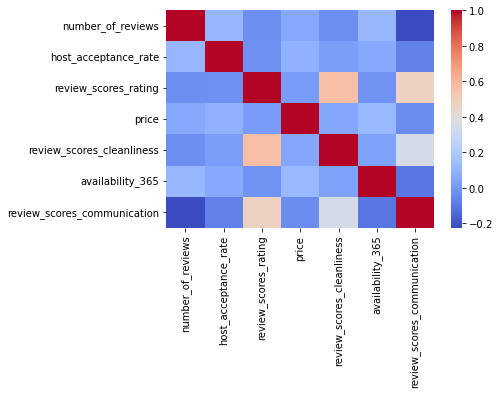

In [310]:
for columna in df1.drop('room_type', axis=1).columns:
  Q3=df1[columna].quantile(q=0.75)
  Q1=df1[columna].quantile(q=0.25)
  Rq=Q3-Q1
  promedio=df1[columna].mean()
  df1[columna]=df1[columna].mask(df1[columna]<Q1-1.5*Rq, promedio)
  df1[columna]=df1[columna].mask(df1[columna]>Q3+1.5*Rq, promedio)
Private_room=df1[df1['room_type']=='Private room']
Shared_room=df1[df1['room_type']=='Shared room']
Hotel_room=df1[df1['room_type']=='Hotel room']
Corr_Factors=Private_room.corr()
Heat_Map=sns.heatmap(Corr_Factors,cmap='coolwarm')
Heat_Map

### Punto 4

#### Private Room

,Predicciones,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
Predicciones,1.000000,1.000000,0.110467,0.033860,0.052642,0.031413,0.118636,0.225381
number_of_reviews,1.000000,1.000000,0.110467,0.033860,0.052642,0.031413,0.118636,0.225381
host_acceptance_rate,0.110467,0.110467,1.000000,0.028032,0.095216,0.017576,0.060859,0.068843
review_scores_rating,0.033860,0.033860,0.028032,1.000000,0.011643,0.560293,0.014890,0.474082
price,0.052642,0.052642,0.095216,0.011643,1.000000,0.050115,0.121293,0.035810
review_scores_cleanliness,0.031413,0.031413,0.017576,0.560293,0.050115,1.000000,0.028627,0.344338
availability_365,0.118636,0.118636,0.060859,0.014890,0.121293,0.028627,1.000000,0.102009
review_scores_communication,0.225381,0.225381,0.068843,0.474082,0.035810,0.344338,0.102009,1.000000


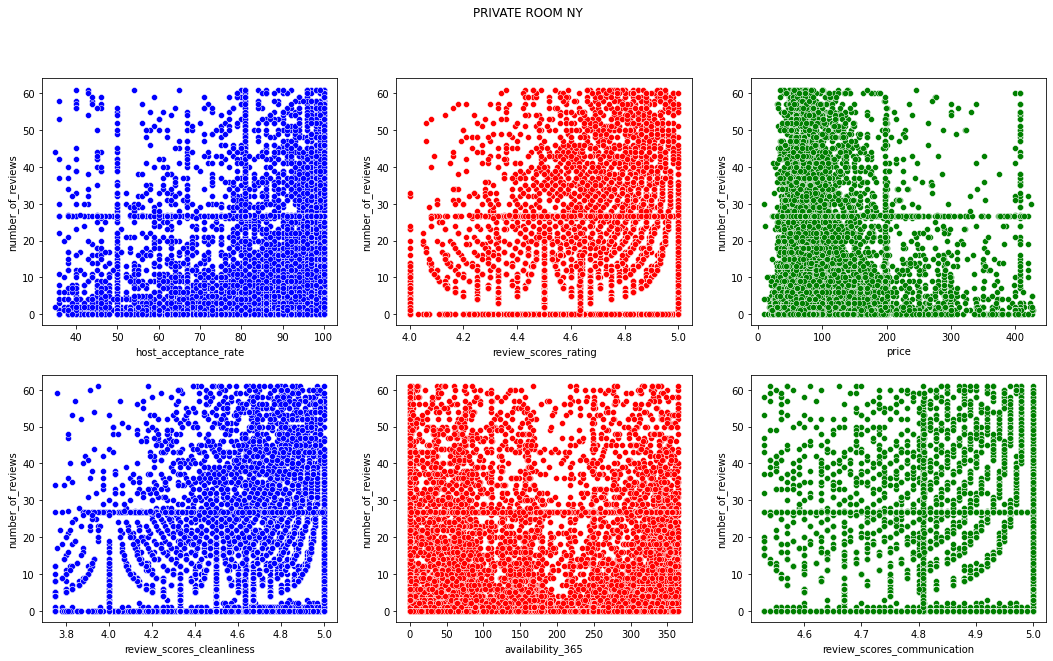

In [326]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('PRIVATE ROOM NY')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Private_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Private_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Private_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Private_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Private_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Private_room)
abs(Private_room.corr())

#### Shared Room

,Predicciones,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
Predicciones,1.000000,1.000000,0.011957,0.052601,0.129885,0.081440,0.061782,0.294074
number_of_reviews,1.000000,1.000000,0.011957,0.052601,0.129885,0.081440,0.061782,0.294074
host_acceptance_rate,0.011957,0.011957,1.000000,0.027584,0.020524,0.009451,0.123125,0.002171
review_scores_rating,0.052601,0.052601,0.027584,1.000000,0.107108,0.517498,0.009708,0.477443
price,0.129885,0.129885,0.020524,0.107108,1.000000,0.058150,0.088264,0.113228
review_scores_cleanliness,0.081440,0.081440,0.009451,0.517498,0.058150,1.000000,0.051547,0.374877
availability_365,0.061782,0.061782,0.123125,0.009708,0.088264,0.051547,1.000000,0.123047
review_scores_communication,0.294074,0.294074,0.002171,0.477443,0.113228,0.374877,0.123047,1.000000


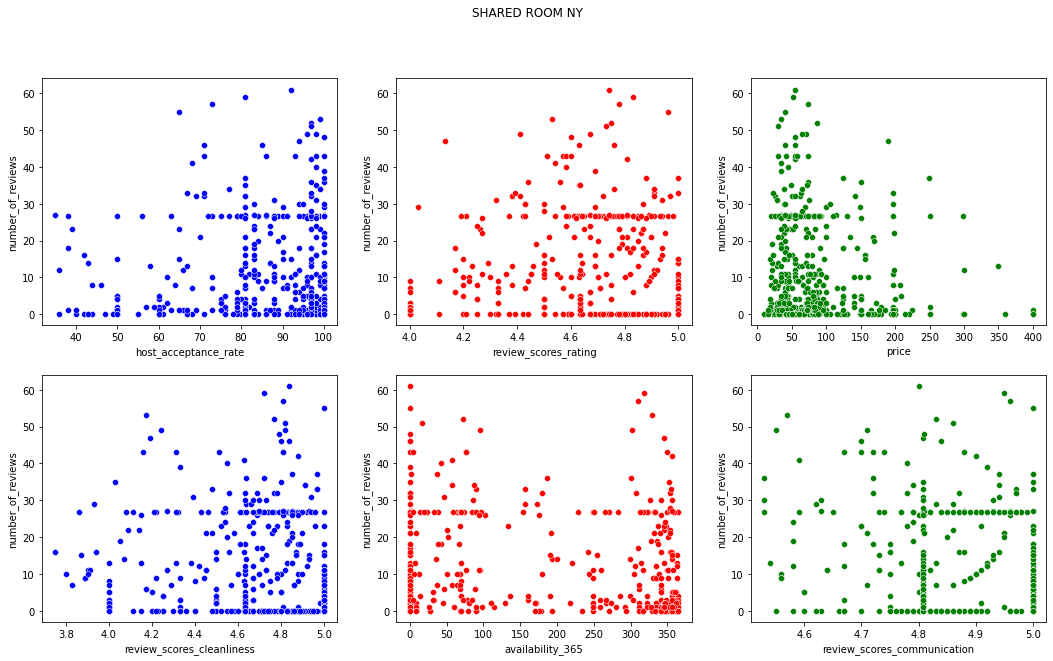

In [327]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('SHARED ROOM NY')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Shared_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Shared_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Shared_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Shared_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Shared_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Shared_room)
abs(Shared_room.corr())

#### Hotel Room

,Predicciones,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
Predicciones,1.000000,1.000000,0.086405,0.460889,0.145465,0.410524,0.019850,0.562974
number_of_reviews,1.000000,1.000000,0.086405,0.460889,0.145465,0.410524,0.019850,0.562974
host_acceptance_rate,0.086405,0.086405,1.000000,0.003157,0.046559,0.044406,0.204846,0.021424
review_scores_rating,0.460889,0.460889,0.003157,1.000000,0.119131,0.646870,0.071783,0.566936
price,0.145465,0.145465,0.046559,0.119131,1.000000,0.068308,0.447615,0.047211
review_scores_cleanliness,0.410524,0.410524,0.044406,0.646870,0.068308,1.000000,0.088489,0.479995
availability_365,0.019850,0.019850,0.204846,0.071783,0.447615,0.088489,1.000000,0.039525
review_scores_communication,0.562974,0.562974,0.021424,0.566936,0.047211,0.479995,0.039525,1.000000


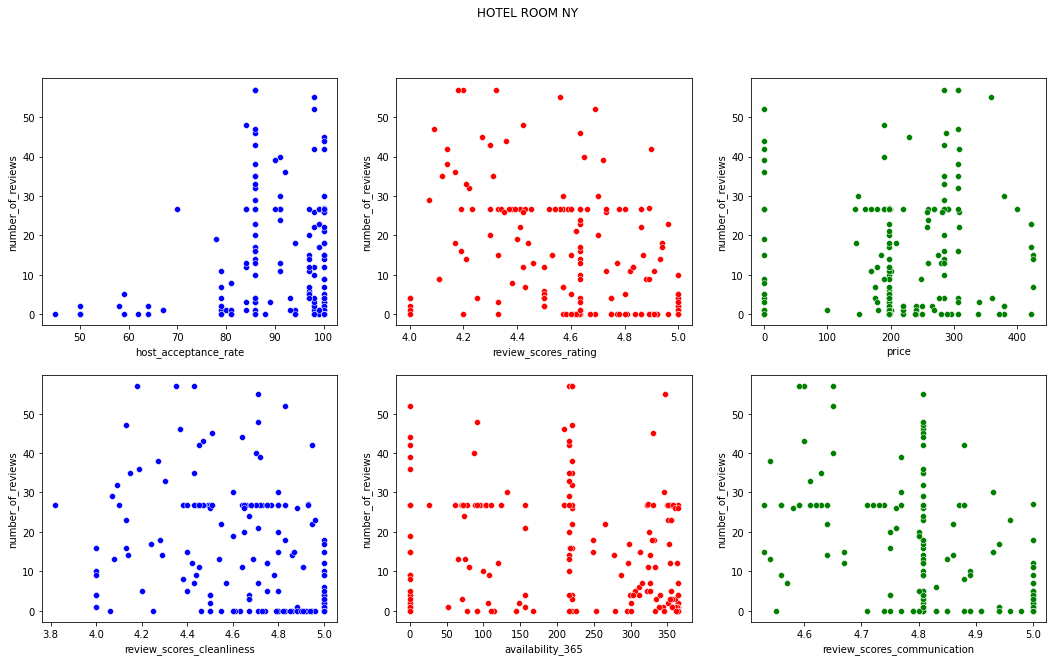

In [332]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('HOTEL ROOM NY')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Hotel_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Hotel_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Hotel_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Hotel_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Hotel_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Hotel_room)
abs(Hotel_room.corr())

### Punto 5

#### Private Room

In [314]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelPR=LinearRegression()
Vars_Indep= Private_room[['review_scores_communication']]
Var_Dep= Private_room['number_of_reviews']
modelPR.fit(X=Vars_Indep,y=Var_Dep)
y_pred=modelPR.predict(X=Private_room[['number_of_reviews']])
Private_room.insert(0,'Predicciones',y_pred)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


0.050796818690050816


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
0,-101.091764,Private room,9.000000,90.000000,4.89,299.0,5.00,356,5.000000
2,-1228.213839,Private room,50.000000,100.000000,4.52,60.0,4.09,335,4.910000
5,146.325277,Private room,0.000000,80.942203,5.00,60.0,5.00,83,5.000000
7,-587.427216,Private room,26.690855,100.000000,4.23,68.0,3.75,160,4.807719
8,-587.427216,Private room,26.690855,86.000000,4.34,55.0,3.88,132,4.760000


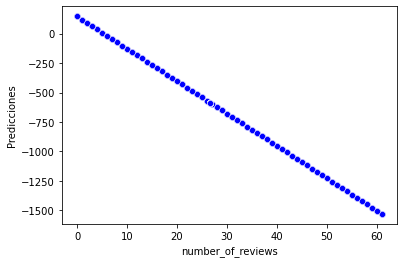

In [315]:
print(modelPR.score(Vars_Indep,Var_Dep))
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='blue',data=Private_room)
Private_room.head()

#### Shared Room

In [316]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelSR=LinearRegression()
SRVars_Indep= Shared_room[['review_scores_communication']]
SRVar_Dep= Shared_room['number_of_reviews']
modelSR.fit(X=SRVars_Indep,y=SRVar_Dep)
y_pred=modelSR.predict(X=Shared_room[['number_of_reviews']])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


0.03420066956122447


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
328,-344.965217,Shared room,16.000000,98.0,4.87,50.000000,4.870000,242,4.87
337,166.537858,Shared room,0.000000,98.0,4.00,90.000000,4.633363,0,5.00
490,6.693147,Shared room,5.000000,50.0,5.00,150.000000,4.800000,362,4.80
713,102.599974,Shared room,2.000000,82.0,5.00,197.547235,5.000000,0,5.00
733,-686.740552,Shared room,26.690855,63.0,4.62,39.000000,4.620000,249,4.86


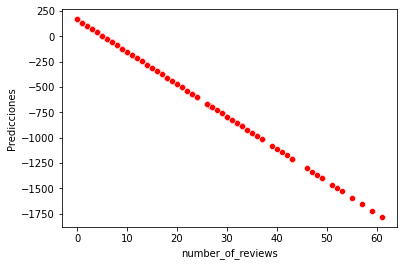

In [317]:
print(modelSR.score(Vars_Indep,Var_Dep))
Shared_room.insert(0,'Predicciones',y_pred)
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='red',data=Shared_room)
Shared_room.head()

#### Hotel Room

In [318]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelHR=LinearRegression()
SRVars_Indep= Shared_room[['review_scores_communication']]
SRVar_Dep= Shared_room['number_of_reviews']

In [319]:
modelHR.fit(X=SRVars_Indep,y=SRVar_Dep)

LinearRegression()

In [320]:
y_pred3=modelSR.predict(X=Hotel_room[['number_of_reviews']])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


0.03420066956122447


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
6,-1176.157714,Hotel room,42.0,98.0,4.90,308.000000,4.95,217,4.88
9,-153.151564,Hotel room,10.0,98.0,5.00,197.547235,5.00,100,4.89
32,-536.778870,Hotel room,22.0,98.0,4.86,308.000000,4.95,221,4.86
339,-664.654639,Hotel room,26.0,98.0,4.73,308.000000,4.88,220,4.76
2389,-408.903101,Hotel room,18.0,94.0,4.94,145.000000,5.00,332,5.00


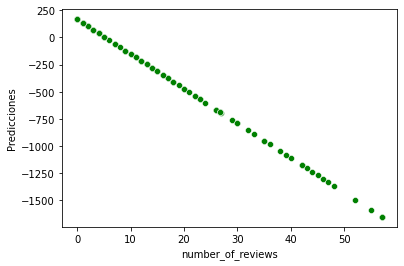

In [321]:
print(modelHR.score(Vars_Indep,Var_Dep))
Hotel_room.insert(0,'Predicciones',y_pred3)
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='green',data=Hotel_room)
Hotel_room.head()

#### Tabla de Coeficientes

In [322]:
Coef_Deter_Hotel=round(modelHR.score(Vars_Indep,Var_Dep),5)
Coef_Deter_Shared=round(modelSR.score(Vars_Indep,Var_Dep),5)
Coef_Deter_Private=round(modelPR.score(Vars_Indep,Var_Dep),5)
Coef_Corr_Hotel=round(np.sqrt(abs(Coef_Deter_Hotel)),5)
Coef_Corr_Shared=round(np.sqrt(abs(Coef_Deter_Shared)),5)
Coef_Corr_Private=round(np.sqrt(Coef_Deter_Private),5)
Coefs = ["Coef_Deter", "Coef_Corr"]
titulo = ["Private_Room", "Shared_Room", "Hotel_Room"]
data = [[Coef_Deter_Private, Coef_Deter_Shared, Coef_Deter_Hotel],
[Coef_Corr_Private, Coef_Corr_Shared, Coef_Corr_Hotel]]
format_row = "{:>12}" * (len(titulo) + 1)
print(format_row.format("", *titulo))
for team, row in zip(Coefs, data):
    print(format_row.format(team, *row))

            Private_Room Shared_Room  Hotel_Room
  Coef_Deter      0.0508      0.0342      0.0342
   Coef_Corr     0.22539     0.18493     0.18493


# Datos México

In [175]:
df=pd.read_csv('../../Data/listings.csv')

#### Datos Nulos y Outliers

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  int64  
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  int64  
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

In [177]:
Valores_nulos=df.isnull().sum()
Valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4067
Length: 75, dtype: int64

In [178]:
df1=df.fillna(method='bfill')
Valores_nulos=df1.isnull().sum()
Valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [179]:
df1=df1[['room_type','number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']]
Valores_nulos=df1.isnull().sum()
print(Valores_nulos)

room_type                      0
number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
dtype: int64


In [180]:
df1.dtypes

room_type                       object
number_of_reviews                int64
host_acceptance_rate            object
review_scores_rating           float64
price                           object
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
dtype: object

In [185]:
#Eliminar Signo de Dolar y convertir columna de price a float
df1['price'] = df1['price'].replace({'\$':''}, regex = True)
df1['price'] = df1['price'].replace({',':''}, regex = True)
df1['price'] = df1['price'].astype(str).astype(float)
#Columna de host_acceptance_rate
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].replace({'%':''}, regex = True)
df1['host_acceptance_rate']= df1['host_acceptance_rate'].astype(str).astype(int)

df1.dtypes


room_type                       object
number_of_reviews                int64
host_acceptance_rate             int32
review_scores_rating           float64
price                          float64
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
dtype: object

In [186]:
for columna in df1.drop('room_type', axis=1).columns:
  Q3=df1[columna].quantile(q=0.75)
  Q1=df1[columna].quantile(q=0.25)
  Rq=Q3-Q1
  promedio=df1[columna].mean()
  df1[columna]=df1[columna].mask(df1[columna]<Q1-1.5*Rq, promedio)
  df1[columna]=df1[columna].mask(df1[columna]>Q3+1.5*Rq, promedio)

In [187]:
df1['room_type'].value_counts()

Entire home/apt    14118
Private room        8316
Shared room          342
Hotel room           172
Name: room_type, dtype: int64

In [188]:
Private_room=df1[df1['room_type']=='Private room']
Shared_room=df1[df1['room_type']=='Shared room']
Hotel_room=df1[df1['room_type']=='Hotel room']

<AxesSubplot:>

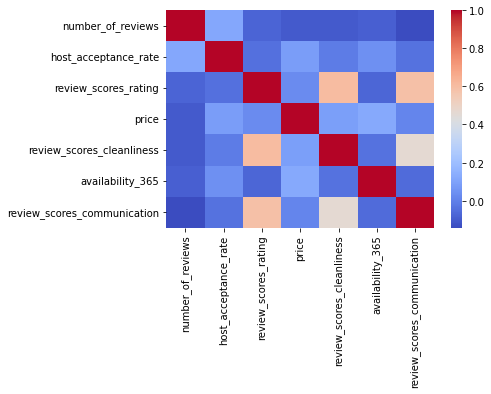

In [189]:
Corr_Factors=Private_room.corr()
Heat_Map=sns.heatmap(Corr_Factors,cmap='coolwarm')
Heat_Map

### Punto 4

#### Private Room

<AxesSubplot:xlabel='review_scores_communication', ylabel='number_of_reviews'>

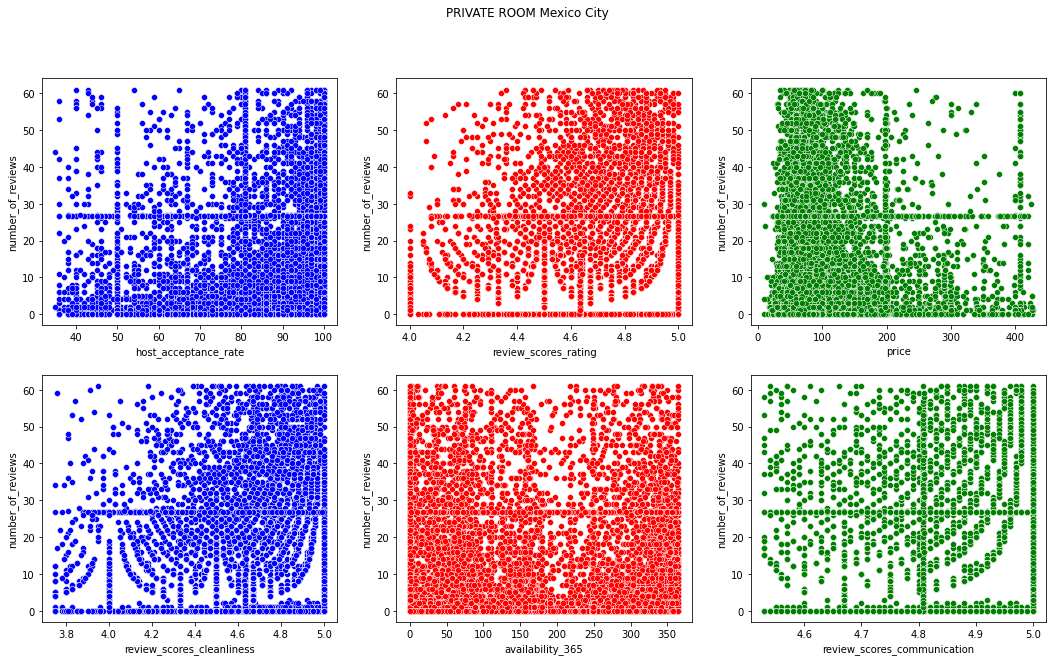

In [333]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('PRIVATE ROOM Mexico City')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Private_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Private_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Private_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Private_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Private_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Private_room)

In [215]:
abs(Private_room.corr())

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
number_of_reviews,1.000000,0.114019,0.077315,0.103862,0.102857,0.090421,0.141873
host_acceptance_rate,0.114019,1.000000,0.046404,0.081712,0.016612,0.041631,0.042991
review_scores_rating,0.077315,0.046404,1.000000,0.029112,0.603288,0.072713,0.589055
price,0.103862,0.081712,0.029112,1.000000,0.089161,0.123657,0.011276
review_scores_cleanliness,0.102857,0.016612,0.603288,0.089161,1.000000,0.040093,0.461644
availability_365,0.090421,0.041631,0.072713,0.123657,0.040093,1.000000,0.058134
review_scores_communication,0.141873,0.042991,0.589055,0.011276,0.461644,0.058134,1.000000


#### Shared Room

<AxesSubplot:xlabel='review_scores_communication', ylabel='number_of_reviews'>

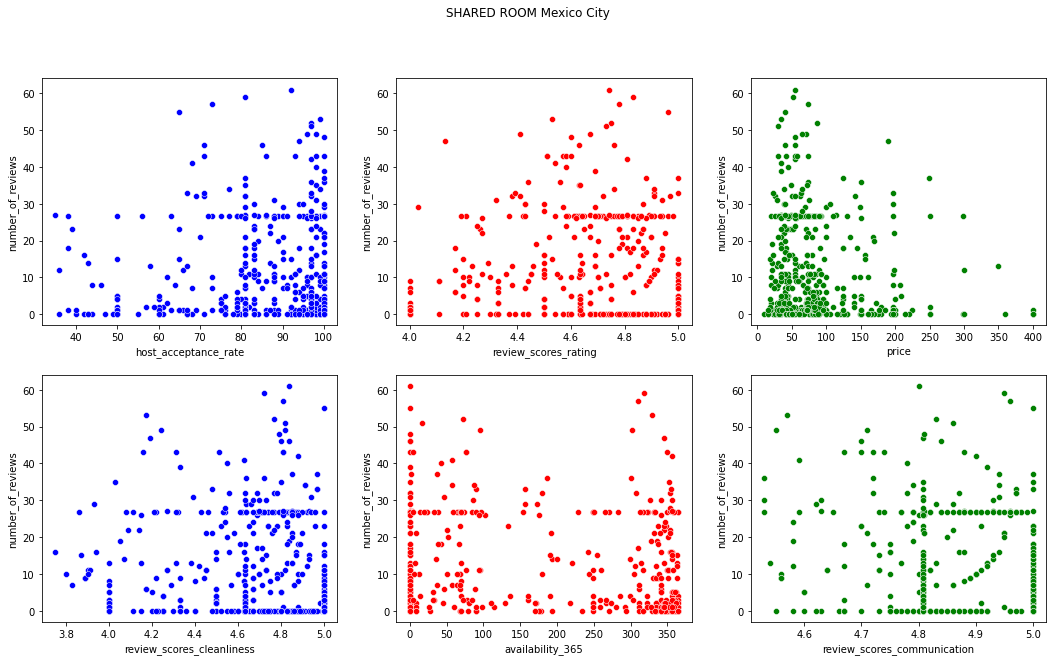

In [334]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('SHARED ROOM Mexico City')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Shared_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Shared_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Shared_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Shared_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Shared_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Shared_room)

In [216]:
abs(Shared_room.corr())

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
number_of_reviews,1.000000,0.098045,0.164946,0.105022,0.193085,0.063884,0.190363
host_acceptance_rate,0.098045,1.000000,0.079608,0.055225,0.003242,0.002540,0.036982
review_scores_rating,0.164946,0.079608,1.000000,0.008319,0.492940,0.001314,0.602098
price,0.105022,0.055225,0.008319,1.000000,0.004375,0.024429,0.092003
review_scores_cleanliness,0.193085,0.003242,0.492940,0.004375,1.000000,0.043278,0.406576
availability_365,0.063884,0.002540,0.001314,0.024429,0.043278,1.000000,0.000514
review_scores_communication,0.190363,0.036982,0.602098,0.092003,0.406576,0.000514,1.000000


#### Hotel Room

<AxesSubplot:xlabel='review_scores_communication', ylabel='number_of_reviews'>

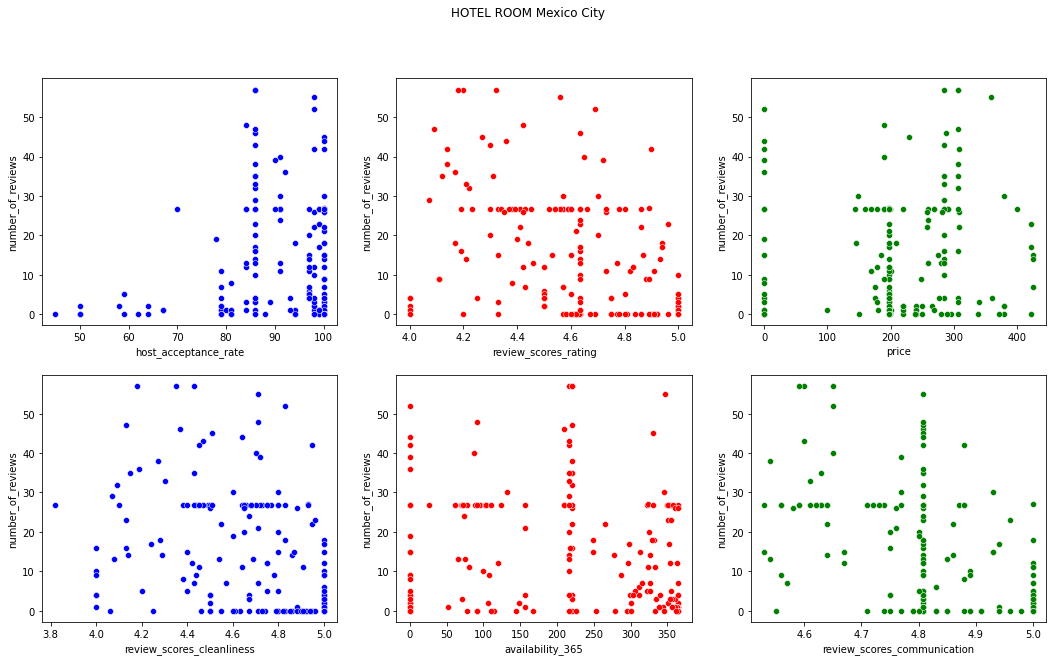

In [335]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('HOTEL ROOM Mexico City')
sns.scatterplot(ax=axes[0, 0],x='host_acceptance_rate',y='number_of_reviews',color='blue',data=Hotel_room)
sns.scatterplot(ax=axes[0, 1],x='review_scores_rating',y='number_of_reviews',color='red',data=Hotel_room)
sns.scatterplot(ax=axes[0, 2],x='price',y='number_of_reviews',color='green',data=Hotel_room)
sns.scatterplot(ax=axes[1, 0],x='review_scores_cleanliness',y='number_of_reviews',color='blue',data=Hotel_room)
sns.scatterplot(ax=axes[1, 1],x='availability_365',y='number_of_reviews',color='red',data=Hotel_room)
sns.scatterplot(ax=axes[1, 2],x='review_scores_communication',y='number_of_reviews',color='green',data=Hotel_room)

In [214]:
abs(Hotel_room.corr())

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
number_of_reviews,1.000000,0.105600,0.124871,0.213069,0.257231,0.148977,0.284007
host_acceptance_rate,0.105600,1.000000,0.112460,0.025541,0.087749,0.006475,0.141121
review_scores_rating,0.124871,0.112460,1.000000,0.186492,0.524710,0.008141,0.524519
price,0.213069,0.025541,0.186492,1.000000,0.300907,0.324823,0.156641
review_scores_cleanliness,0.257231,0.087749,0.524710,0.300907,1.000000,0.026462,0.399804
availability_365,0.148977,0.006475,0.008141,0.324823,0.026462,1.000000,0.090308
review_scores_communication,0.284007,0.141121,0.524519,0.156641,0.399804,0.090308,1.000000


### Punto 5

#### Private Room

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelPR=LinearRegression()
Vars_Indep= Private_room[['review_scores_communication']]
Var_Dep= Private_room['number_of_reviews']
modelPR.fit(X=Vars_Indep,y=Var_Dep)
y_pred=modelPR.predict(X=Private_room[['number_of_reviews']])
#Private_room.insert(0,'Predicciones',y_pred)

In [242]:
print(modelPR.score(Vars_Indep,Var_Dep))

0.020128069068557575


,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
1,-536.461150,Private room,27.000000,100.000000,4.96,500.0,4.93,363,4.93
2,-671.999629,Private room,32.446706,89.386788,4.73,599.0,4.70,323,4.91
8,-1307.880270,Private room,58.000000,89.386788,4.91,1198.0,4.91,175,4.95
16,135.420019,Private room,0.000000,99.000000,4.88,1360.0,4.86,88,4.93
18,-671.999629,Private room,32.446706,89.386788,4.73,440.0,4.67,297,4.92


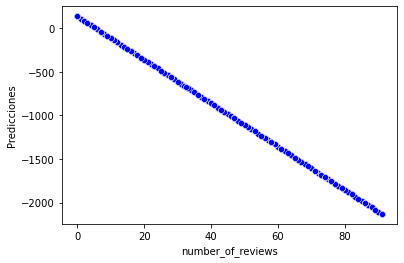

In [262]:
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='blue',data=Private_room)
Private_room.head()

#### Shared Room

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelSR=LinearRegression()
SRVars_Indep= Shared_room[['review_scores_communication']]
SRVar_Dep= Shared_room['number_of_reviews']
modelSR.fit(X=SRVars_Indep,y=SRVar_Dep)
y_pred=modelSR.predict(X=Shared_room[['number_of_reviews']])

In [244]:
print(modelSR.score(Vars_Indep,Var_Dep))

-0.14644460915269097


In [252]:
Shared_room.insert(0,'Predicciones',y_pred)

,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
138,104.291862,Shared room,0.000000,89.386788,4.88,2000.0,4.83,365,4.67
298,104.291862,Shared room,0.000000,100.000000,5.00,879.0,5.00,365,5.00
301,-548.246718,Shared room,32.446706,97.000000,4.93,333.0,4.90,135,5.00
365,-76.707938,Shared room,9.000000,88.000000,5.00,200.0,4.67,349,5.00
400,-338.152094,Shared room,22.000000,100.000000,4.50,300.0,4.55,363,4.73


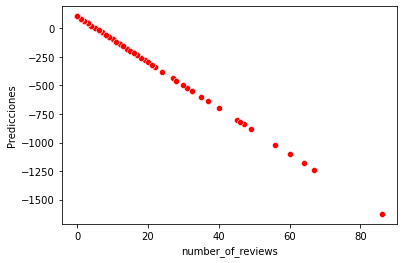

In [253]:
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='red',data=Shared_room)
Shared_room.head()

#### Hotel Room

In [246]:
#Declaramos las variables dependientes e independientes para la regresión lineal
from sklearn.linear_model import LinearRegression
modelHR=LinearRegression()
SRVars_Indep= Shared_room[['review_scores_communication']]
SRVar_Dep= Shared_room['number_of_reviews']

In [247]:
modelHR.fit(X=SRVars_Indep,y=SRVar_Dep)

LinearRegression()

In [258]:
y_pred3=modelSR.predict(X=Hotel_room[['number_of_reviews']])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- review_scores_communication

  warnings.warn(message, FutureWarning)


In [250]:
print(modelHR.score(Vars_Indep,Var_Dep))

-0.14644460915269097


In [259]:
Hotel_room.insert(0,'Predicciones',y_pred3)

,Predicciones,room_type,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication
22,-519.151893,Hotel room,31.0,88.000000,4.97,1098.0,4.94,348,5.0
24,-76.707938,Hotel room,9.0,89.386788,4.89,600.0,5.00,364,5.0
26,-780.596049,Hotel room,44.0,88.000000,4.98,998.0,4.91,345,5.0
31,-277.818827,Hotel room,19.0,88.000000,4.95,998.0,4.95,327,5.0
45,-36.485760,Hotel room,7.0,89.386788,4.71,2860.0,5.00,347,5.0


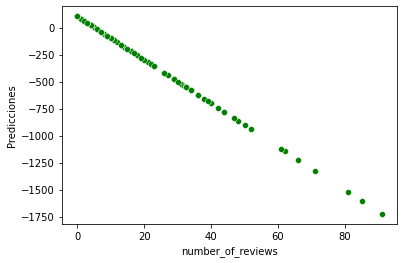

In [261]:
sns.scatterplot(x='number_of_reviews',y='Predicciones',color='green',data=Hotel_room)
Hotel_room.head()

#### Tabla de coeficientes de correlación y determinación

In [276]:
Coef_Deter_Hotel=round(modelHR.score(Vars_Indep,Var_Dep),5)
Coef_Deter_Shared=round(modelSR.score(Vars_Indep,Var_Dep),5)
Coef_Deter_Private=round(modelPR.score(Vars_Indep,Var_Dep),5)
Coef_Corr_Hotel=round(np.sqrt(abs(Coef_Deter_Hotel)),5)
Coef_Corr_Shared=round(np.sqrt(abs(Coef_Deter_Shared)),5)
Coef_Corr_Private=round(np.sqrt(Coef_Deter_Private),5)
Coefs = ["Coef_Deter", "Coef_Corr"]
titulo = ["Private_Room", "Shared_Room", "Hotel_Room"]
data = [[Coef_Deter_Private, Coef_Deter_Shared, Coef_Deter_Hotel],
[Coef_Corr_Private, Coef_Corr_Shared, Coef_Corr_Hotel]]
format_row = "{:>12}" * (len(titulo) + 1)
print(format_row.format("", *titulo))
for team, row in zip(Coefs, data):
    print(format_row.format(team, *row))

0.38267
0.14188
0.38267
            Private_Room Shared_Room  Hotel_Room
  Coef_Deter     0.02013    -0.14644    -0.14644
   Coef_Corr     0.14188     0.38267     0.38267
